In [10]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [56]:
f=open("/Users/fcucchietti/Downloads/sonar-mobility_sonar_1718356083607219540_1718357884126299134_100.txt").readlines()

In [57]:
data = pd.DataFrame( map(json.loads,f) )

In [58]:
data.head()

,cell,cell_coordinates,client_coordinates,client_ipaddr,client_latitude,client_longitude,client_macaddr,client_roll,client_username,client_xy_coordinates,...,day_of_month,day_of_year,week_of_year,month_of_year,date,journey,journey_path,zone,dwell_time_sum,clients
0,429080_4580440,"41.372352696174495,2.1519469473172492","41.37236568312405,2.1519629160858793",10.92.131.32,41.372366,2.151963,bc:a8:a6:e0:a0:b0,NaN,None,"94.5,110.6",...,14,166,24,Junio,14-06-24,,,NaN,NaN,NaN
1,429040_4580460,"41.37252930375453,2.151466341390423","41.37266293330781,2.151670022085485",10.93.131.50,41.372663,2.151670,64:79:f0:a6:6c:92,NaN,None,"171.6,249",...,14,166,24,Junio,14-06-24,001f.001T.001U>0013.001O.001Q>001f.001T.001U,0000.0002.0003.000S.0011.001f.001T.001U>0000.0...,NaN,NaN,NaN
2,428960_4580580,"41.37360304570223,2.150495747205922","41.3737377921347,2.1506395035865227",None,41.373738,2.150640,e4:fd:45:fc:f7:65,NaN,None,"475.3,125.1",...,14,166,24,Junio,14-06-24,001d.001o.001p,0000.0002.0003.000S.000U.001d.001o.001p,NaN,NaN,NaN
3,429060_4580440,"41.372350933565194,2.1517078148022337","41.372517541482104,2.151850389283371",None,41.372518,2.151850,58:00:e3:b5:78:4f,NaN,None,"88.1,158.9",...,14,166,24,Junio,14-06-24,001a.001R.001S,0000.0002.0003.000S.0011.001a.001R.001S,NaN,NaN,NaN
4,427500_4578480,"41.3545589129953,2.1332898258988298","41.35471980417132,2.133477490386449",None,41.354720,2.133477,54:77:87:64:b8:01,NaN,None,"485.6,215.9",...,14,166,24,Junio,14-06-24,,,NaN,NaN,NaN


In [59]:
data.timestamp = pd.to_datetime(data.timestamp, unit='s')
data.timestamp.tail()

9995   2024-06-14 09:38:03
9996   2024-06-14 09:38:03
9997   2024-06-14 09:38:03
9998   2024-06-14 09:38:03
9999   2024-06-14 09:38:03
Name: timestamp, dtype: datetime64[ns]

In [45]:
data[['cell_coord_lat', 'cell_coord_lon']] = data.cell_coordinates.str.split(",", expand=True).astype(float)
data[['client_coord_lat', 'client_coord_lon']] = data.client_coordinates.str.split(",", expand=True).astype(float)
data[['client_x', 'client_y']] = data.client_xy_coordinates.str.split(",", expand=True).astype(float)

<AxesSubplot:xlabel='client_x', ylabel='client_y'>

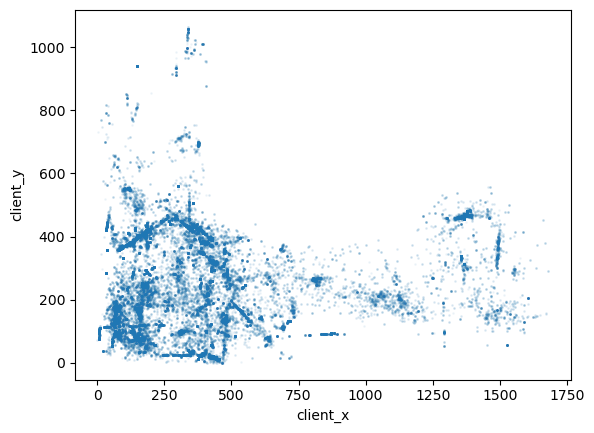

In [46]:
data.plot.scatter("client_x","client_y",s=1,alpha=0.05)